In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy import stats
dataset = pd.read_csv("Downloads/house_price/train.csv")
print("Full train dataset shape is {}".format(dataset.shape))

In [58]:
dataset.info()
dataset.describe()
null_count = dataset.isnull().sum()
null_count[null_count > 1]
print(null_count)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,IR1,Lvl,AllPub,Inside,...,0,320,0,0,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,IR1,Lvl,AllPub,Corner,...,228,0,0,0,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,Reg,Lvl,AllPub,Inside,...,205,0,0,0,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,Reg,Lvl,AllPub,Corner,...,0,0,0,0,0,1,2008,WD,Normal,118000


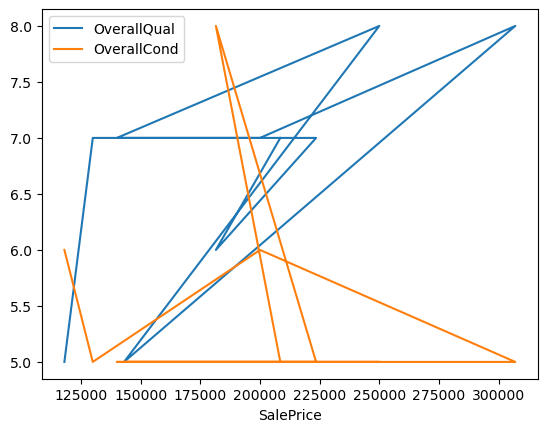

In [74]:
df = dataset[["OverallQual","OverallCond","YearBuilt","SaleCondition","SalePrice"]].head(10)
df.plot(x="SalePrice", y=["OverallQual","OverallCond"])
dataset_tr = dataset.drop(["Alley" , "FireplaceQu" , "PoolQC" , "Fence" ,"MiscFeature" , "FireplaceQu"] , axis = 1)
dataset_tr.head(15)

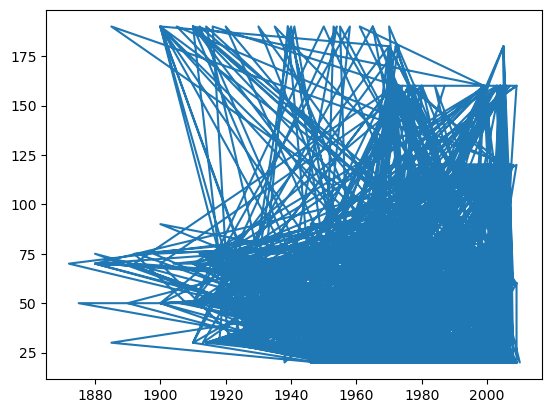

In [75]:
plt.plot(dataset["YearBuilt"], dataset["MSSubClass"])

In [76]:
sns.barplot(y=dataset.index,x=["LotArea"],palette="flare")
plt.xlabel("Area")
plt.title("Lot area of houses");

KeyError: 'LotArea'

Text(0.5, 1.0, 'Year Built vs Sale Price')

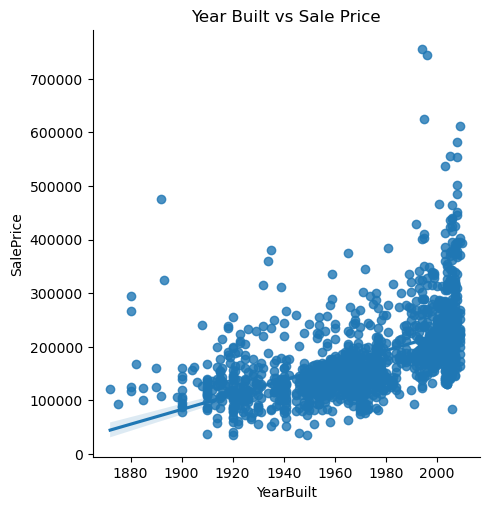

In [77]:
sns.lmplot(x="YearBuilt", y="SalePrice", data=dataset);
plt.title("Year Built vs Sale Price")

In [78]:
#plt.boxplot(dataset["SalePrice"])
plt.boxplot(dataset["OverallQual", "OverallCond", "MoSold"])


KeyError: ('OverallQual', 'OverallCond', 'MoSold')

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


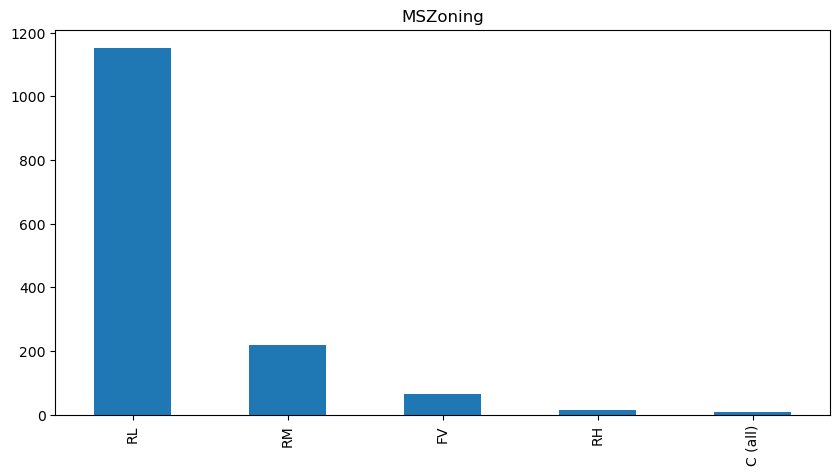

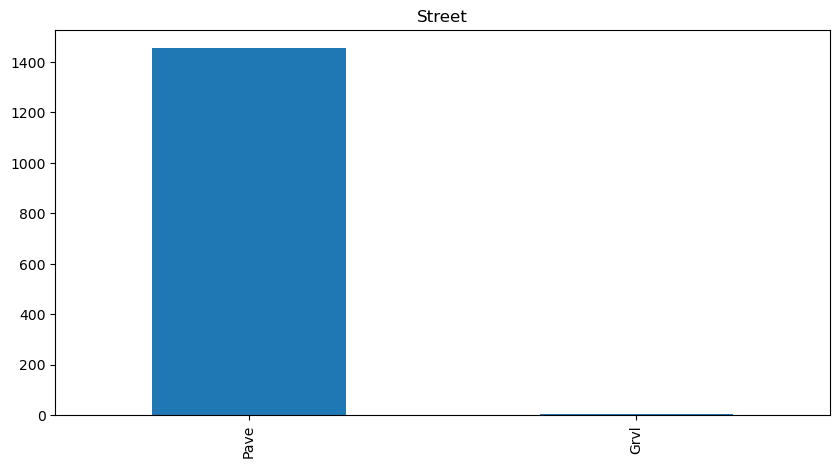

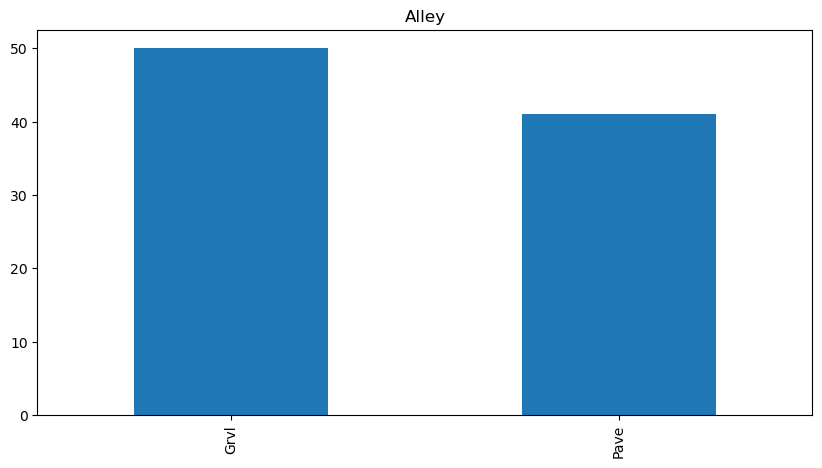

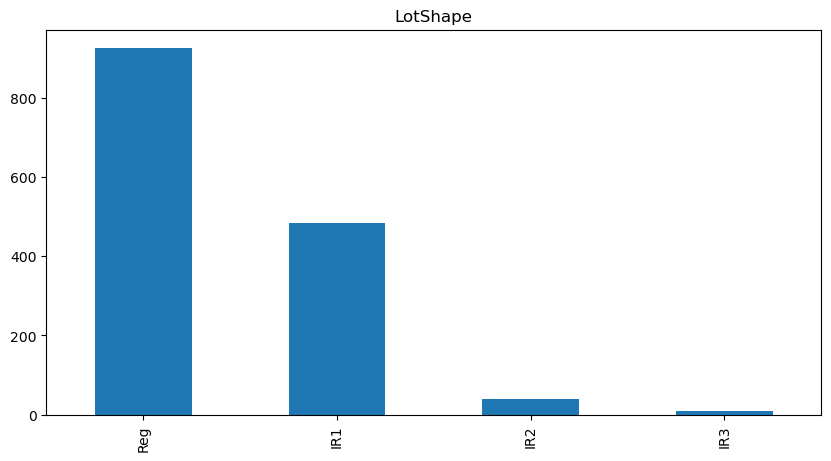

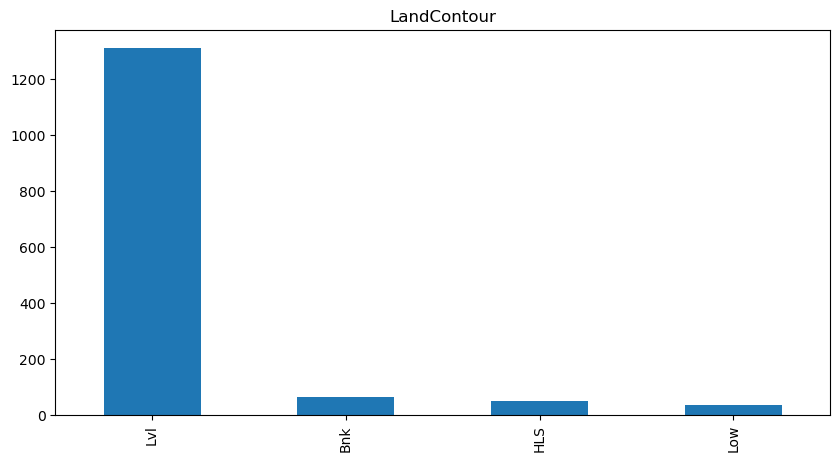

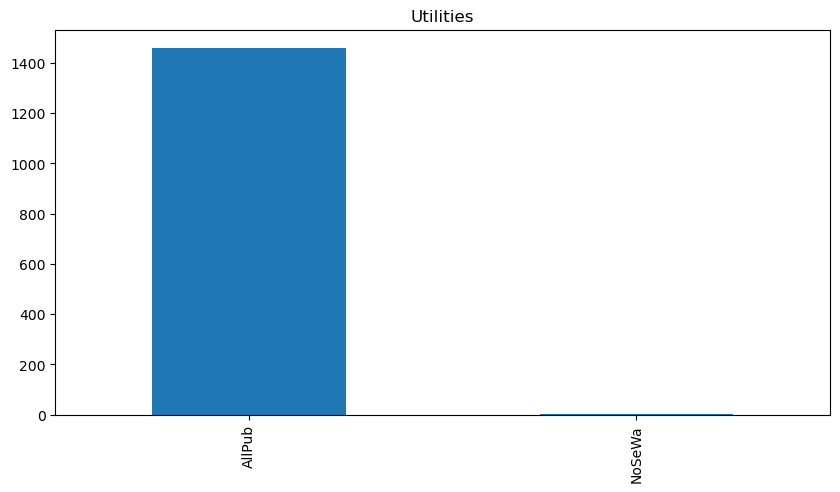

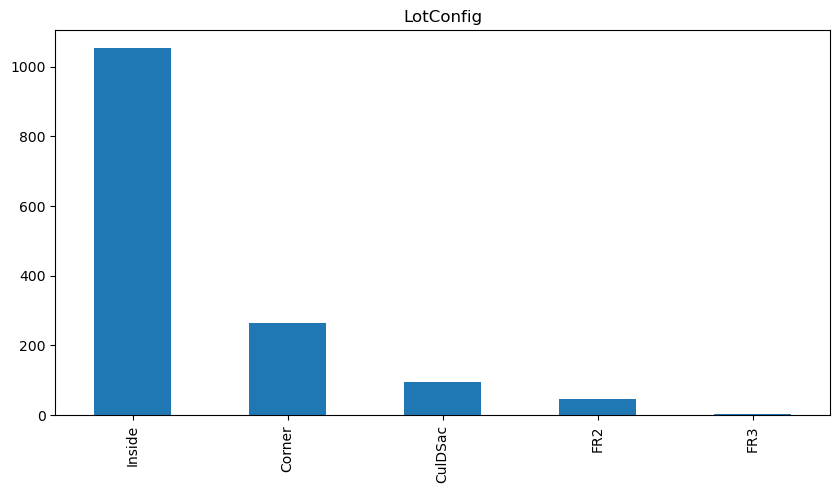

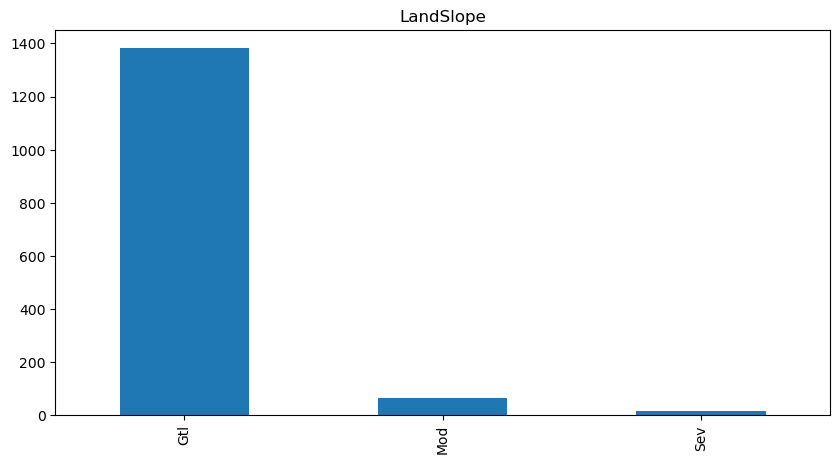

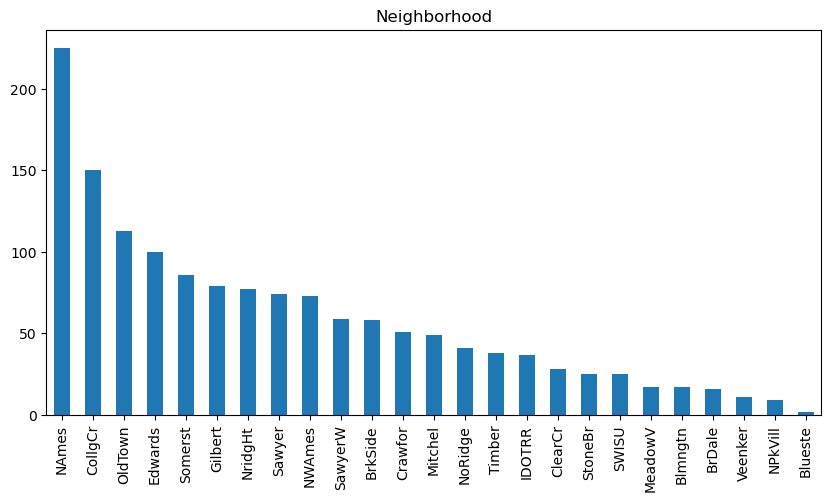

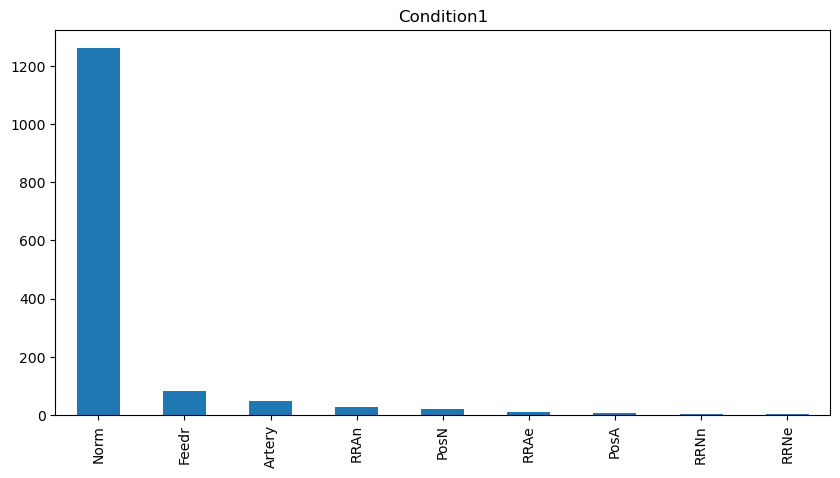

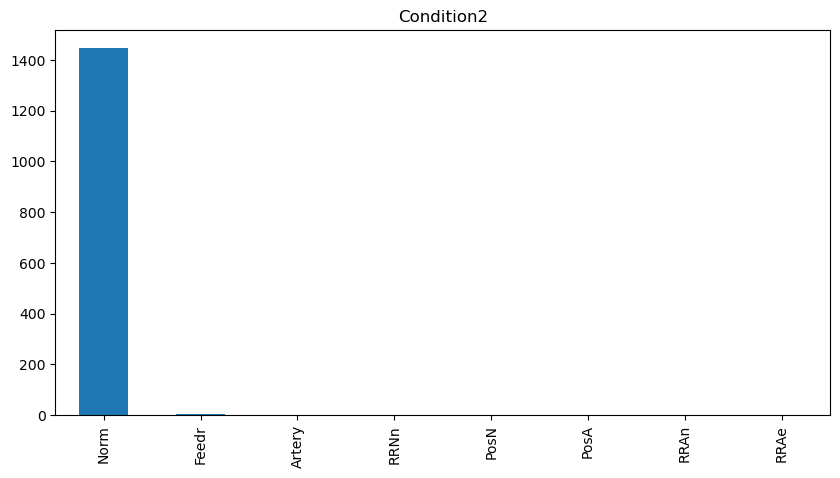

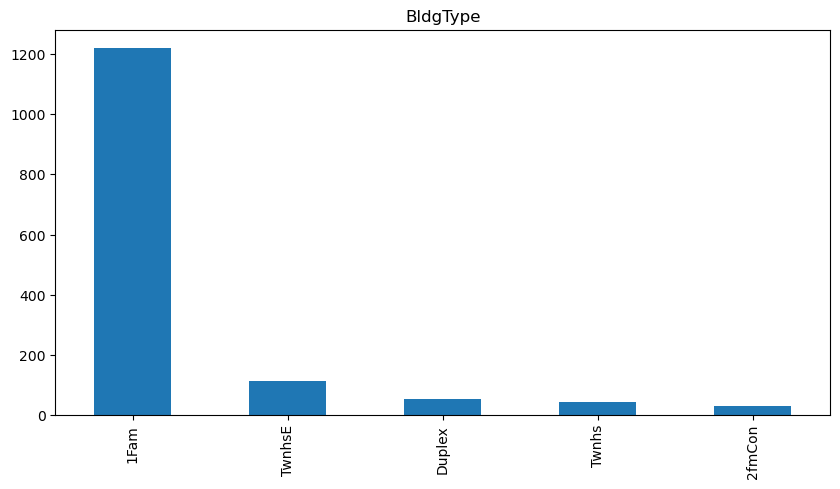

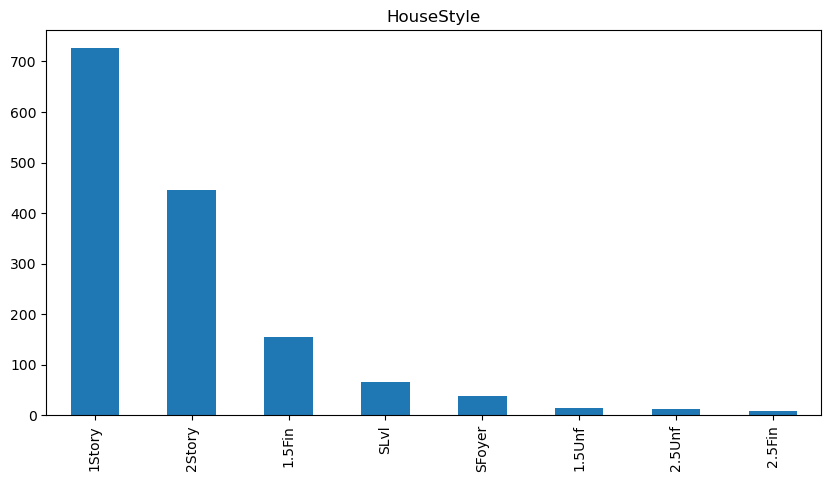

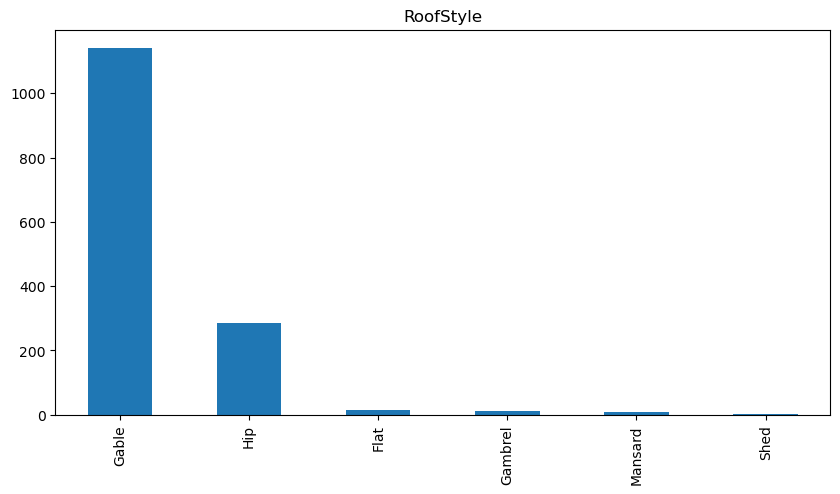

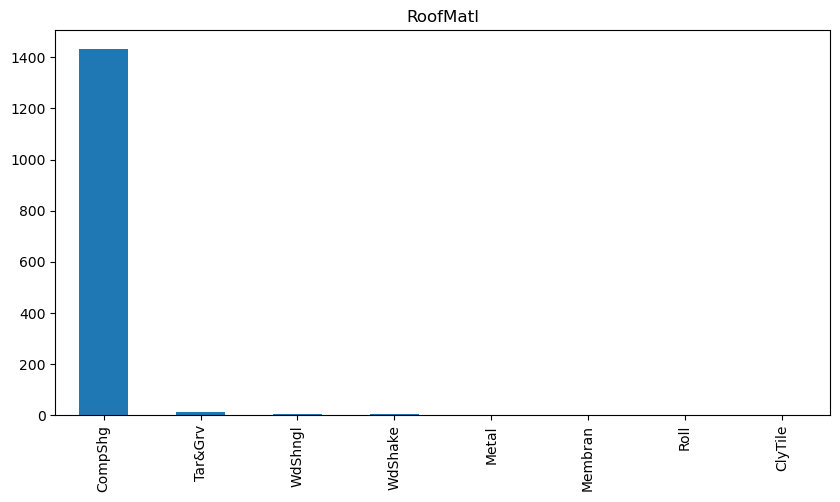

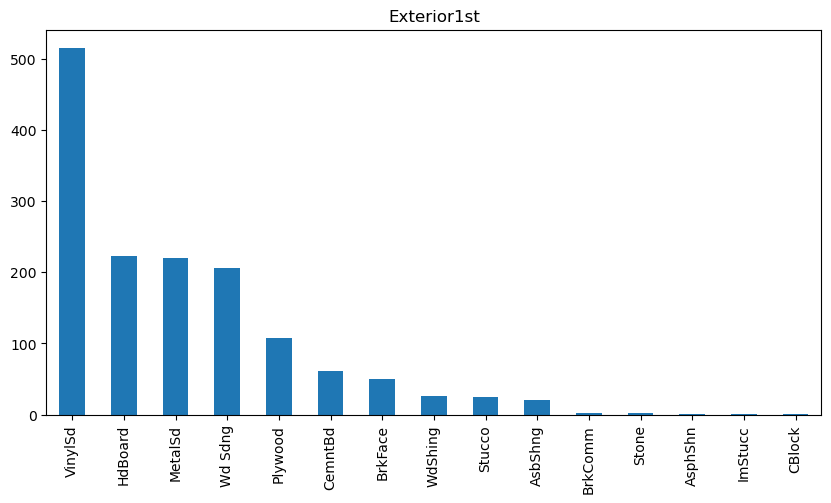

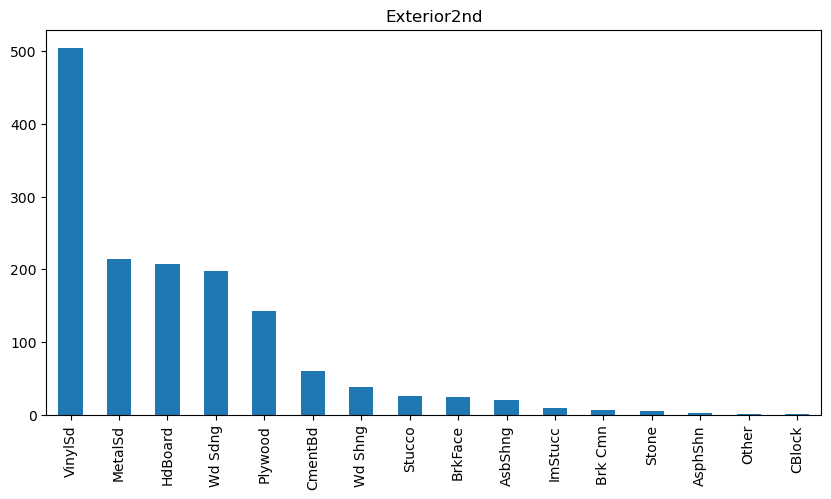

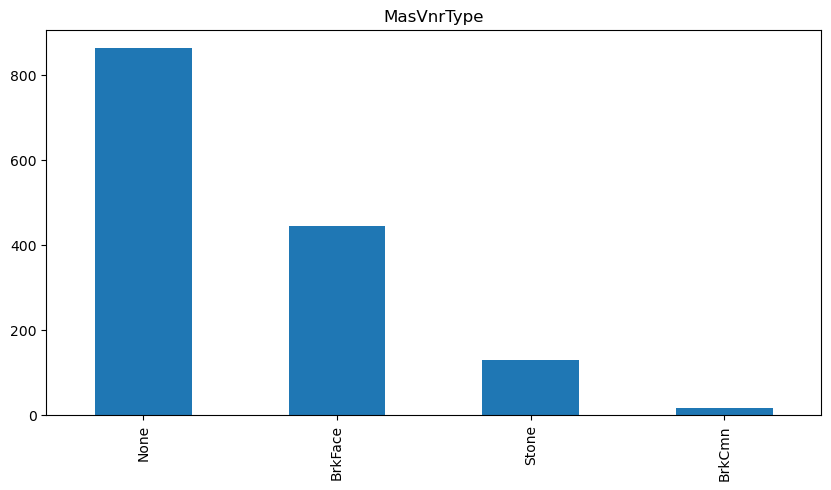

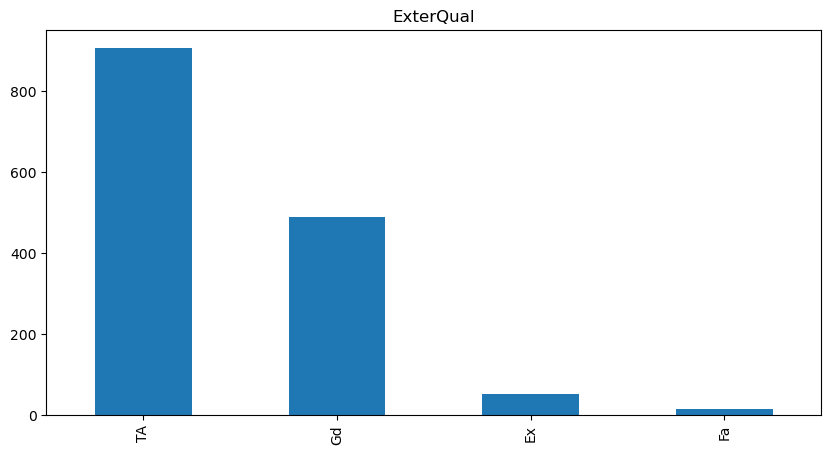

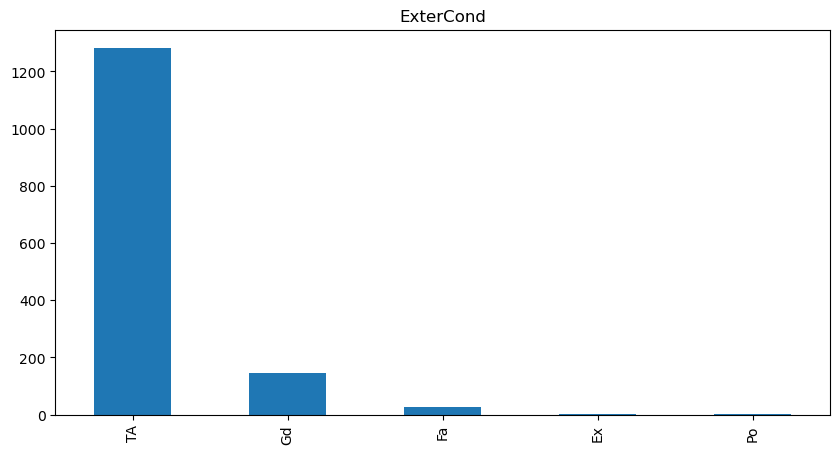

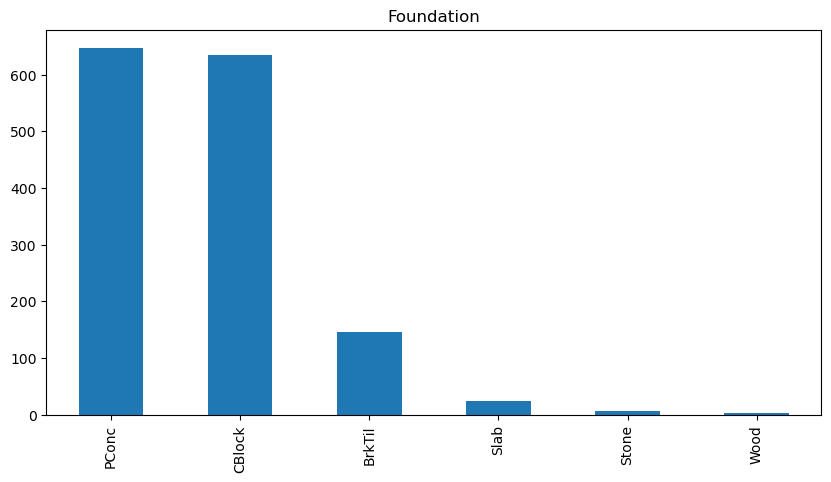

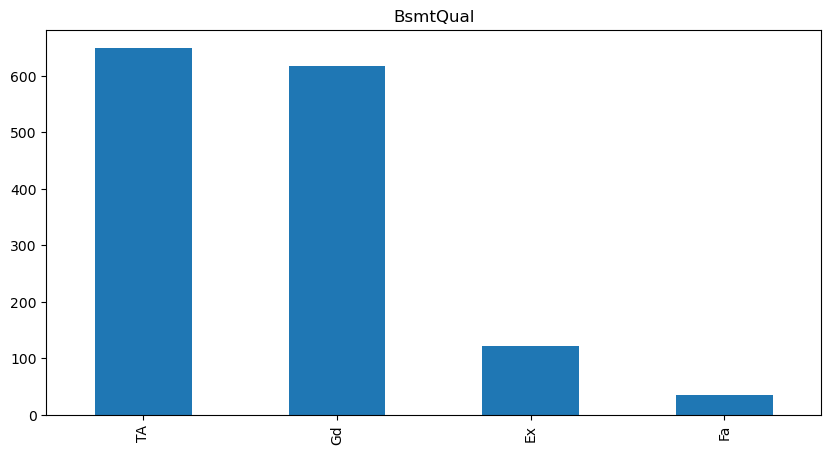

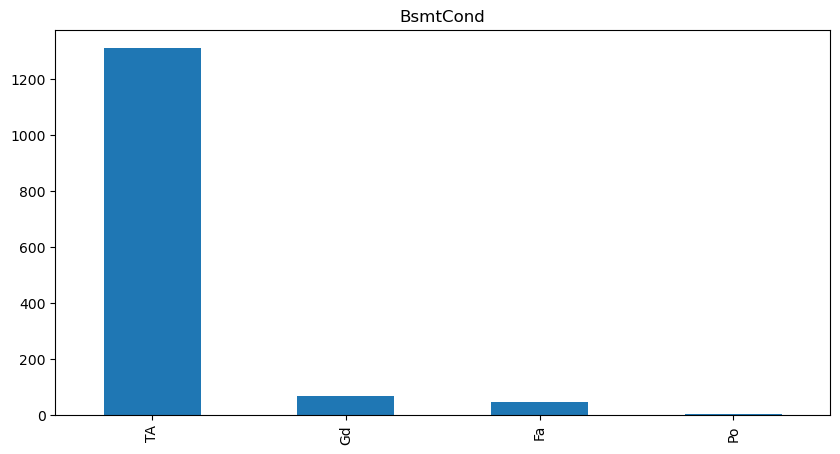

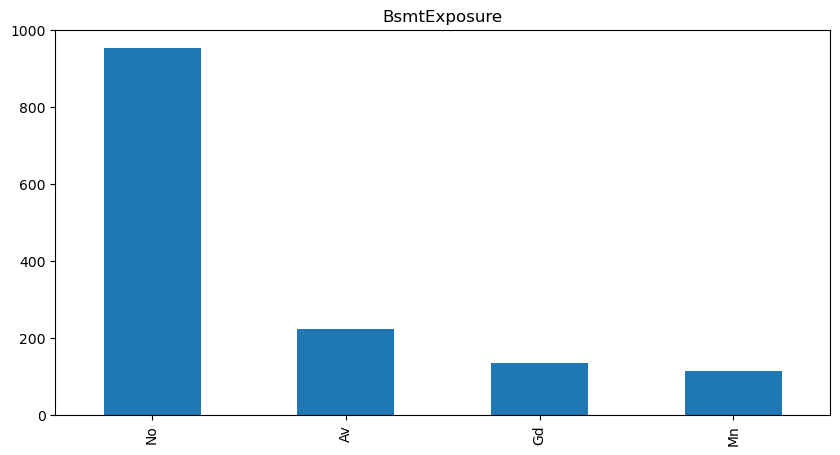

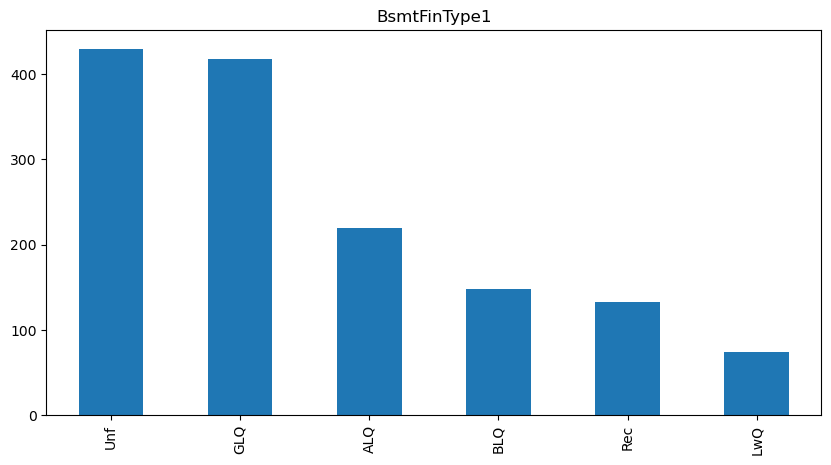

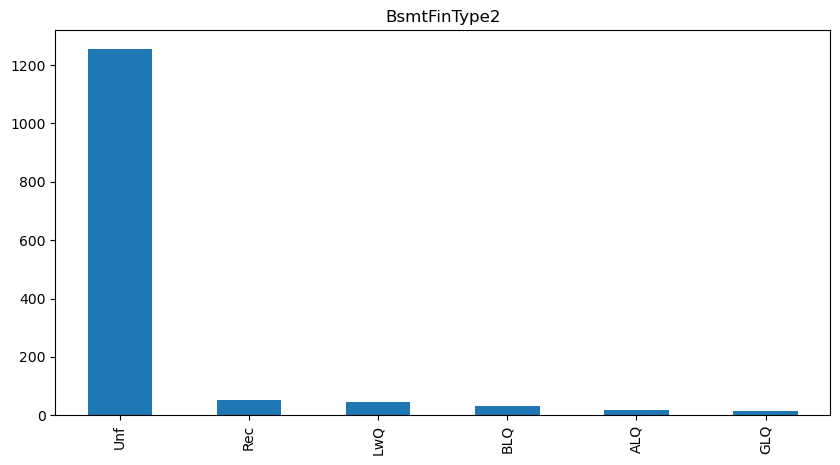

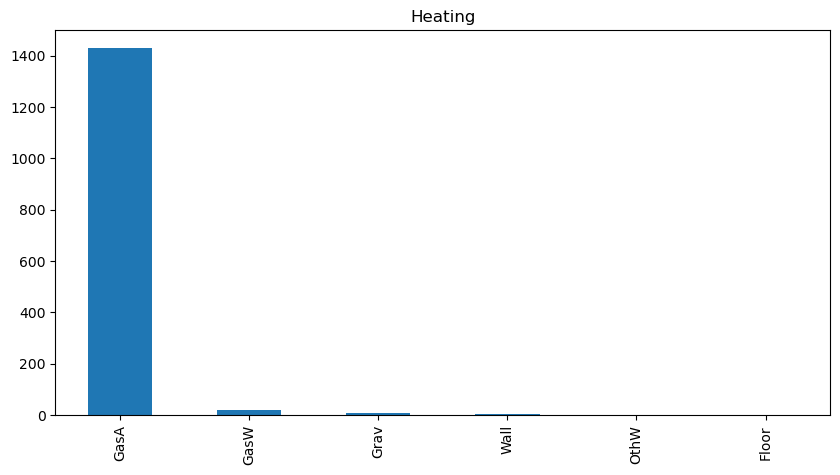

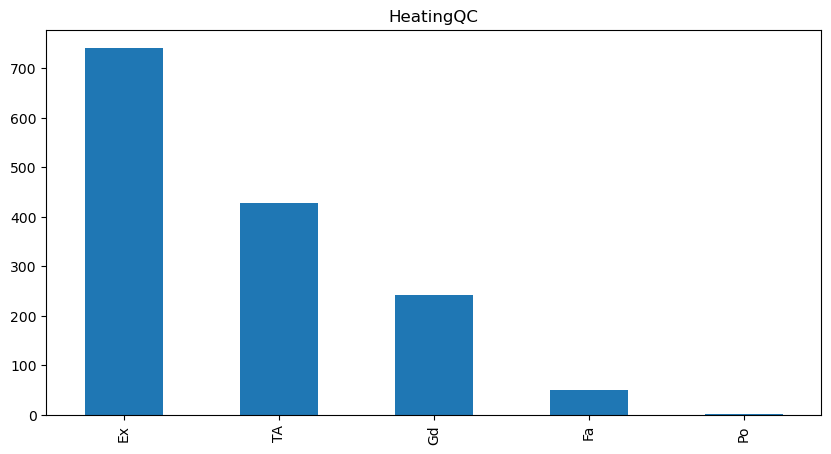

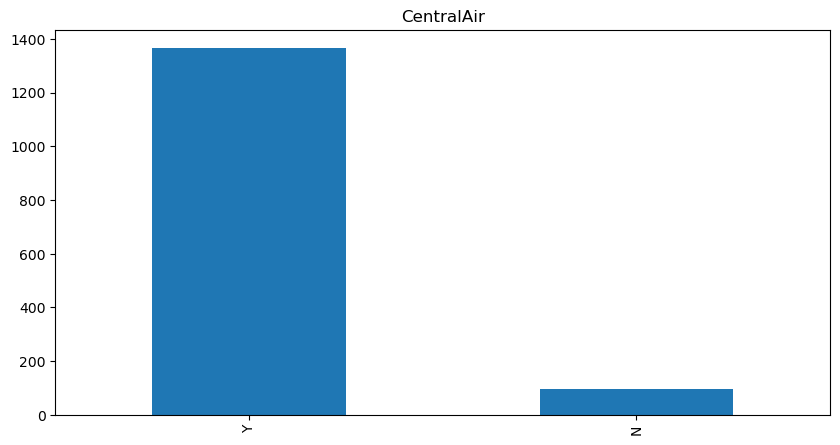

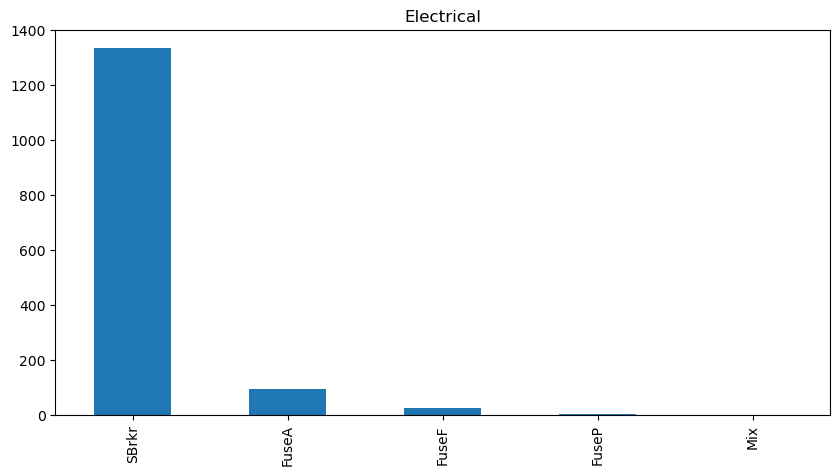

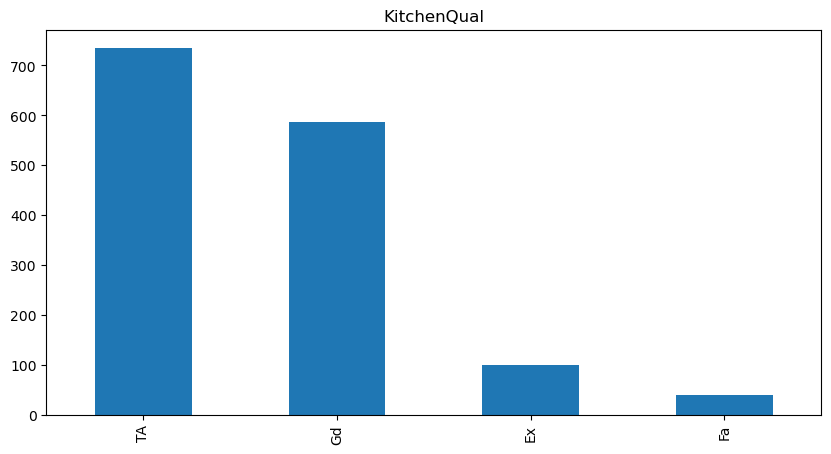

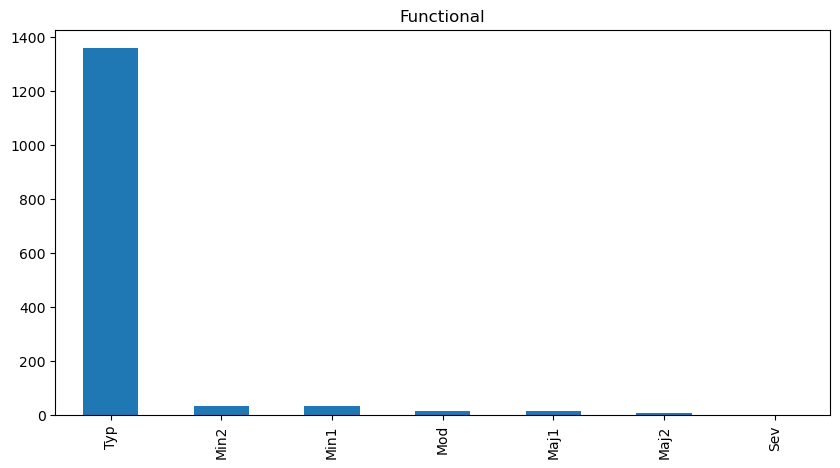

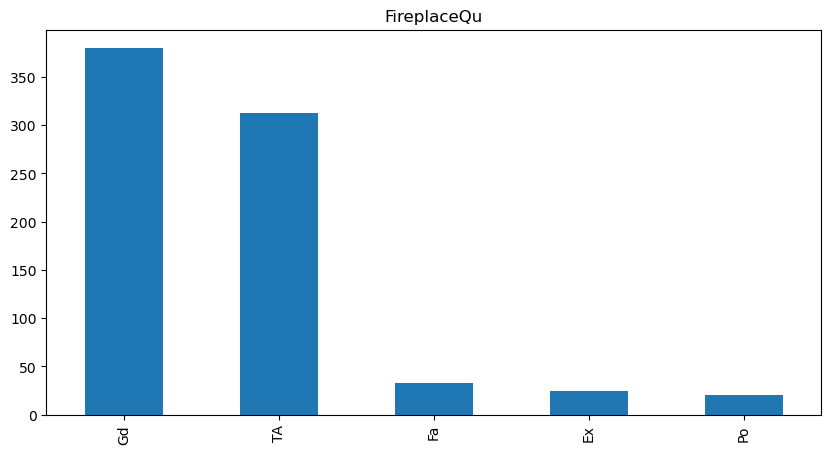

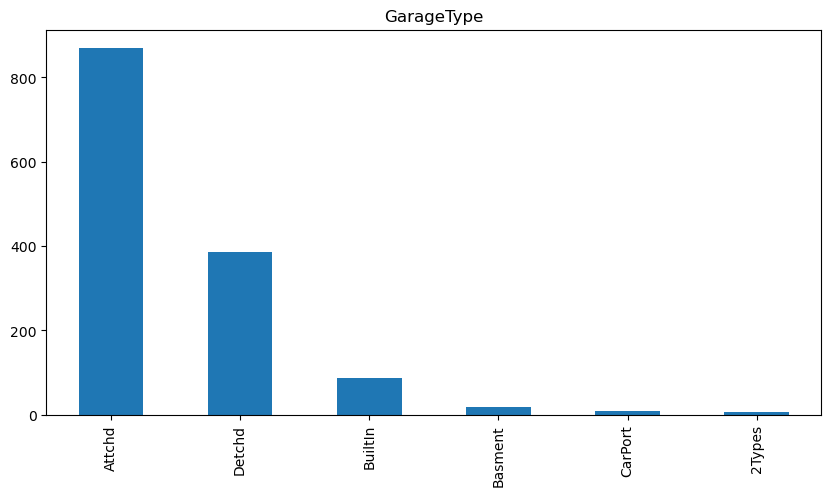

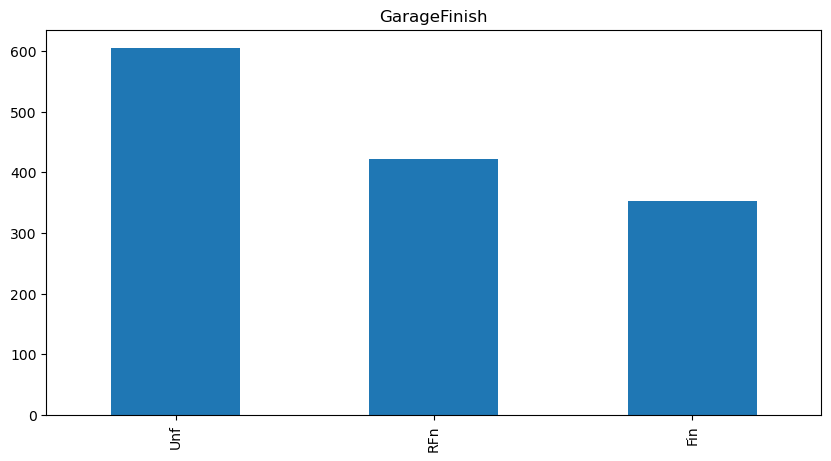

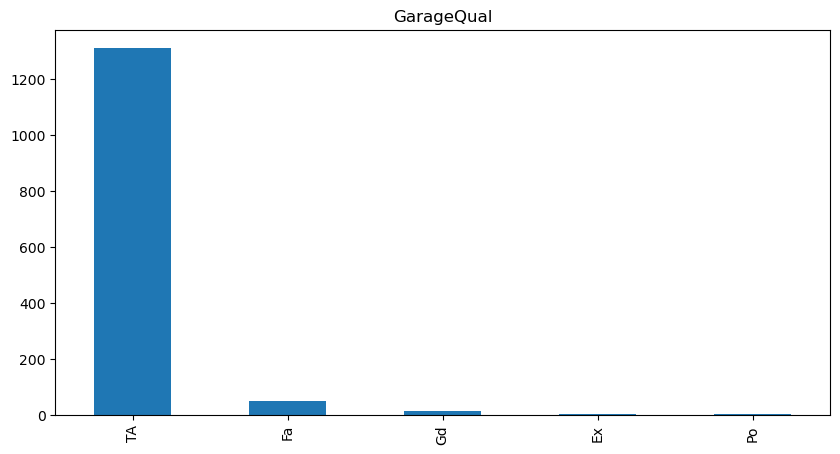

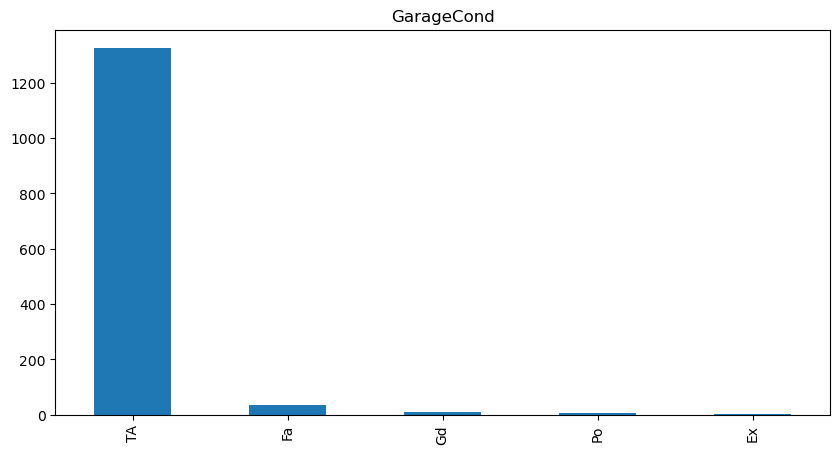

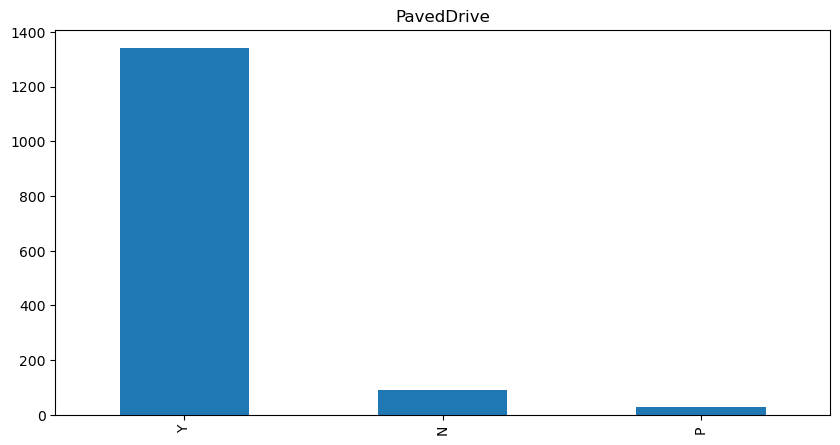

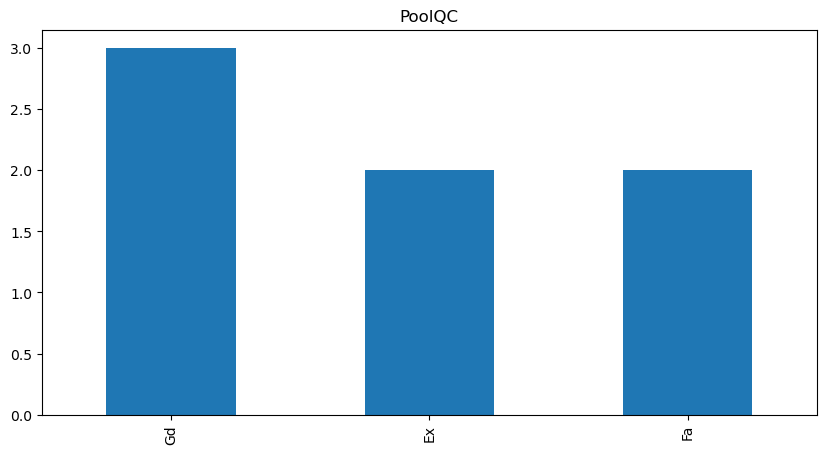

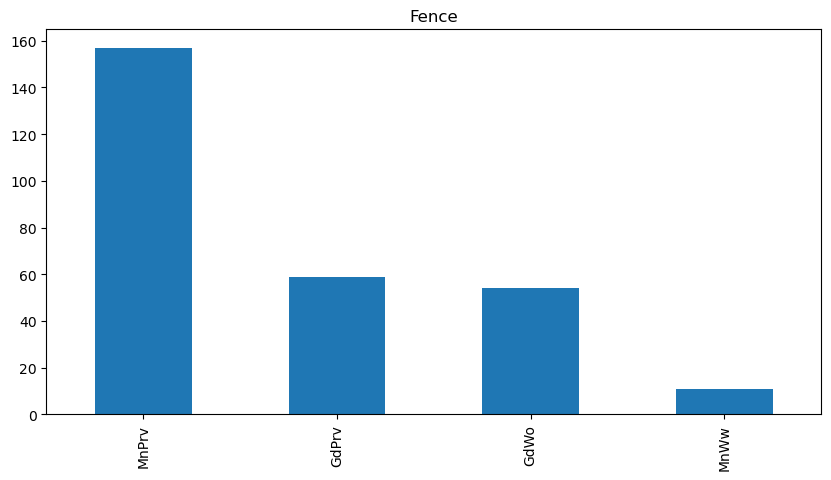

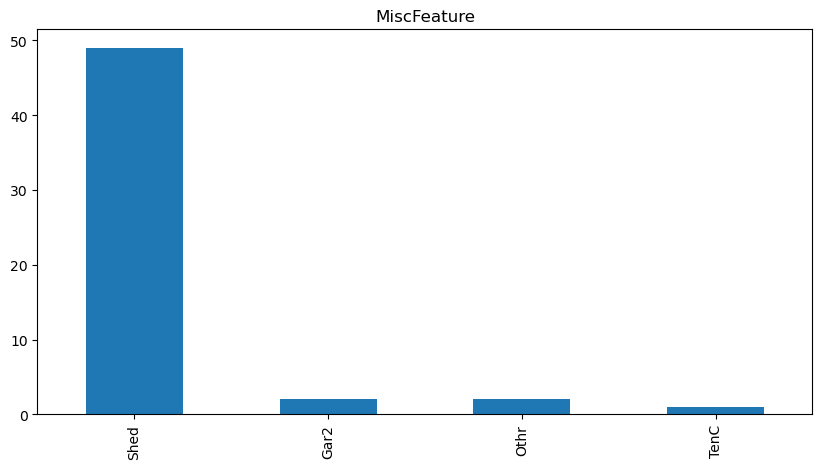

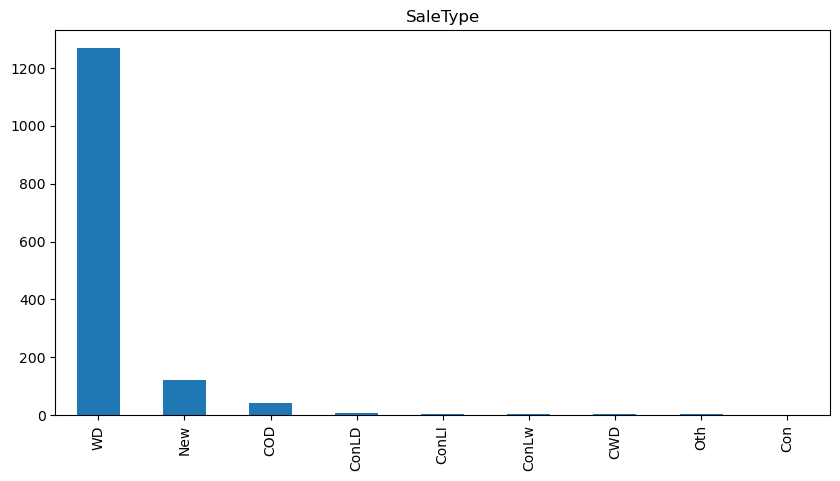

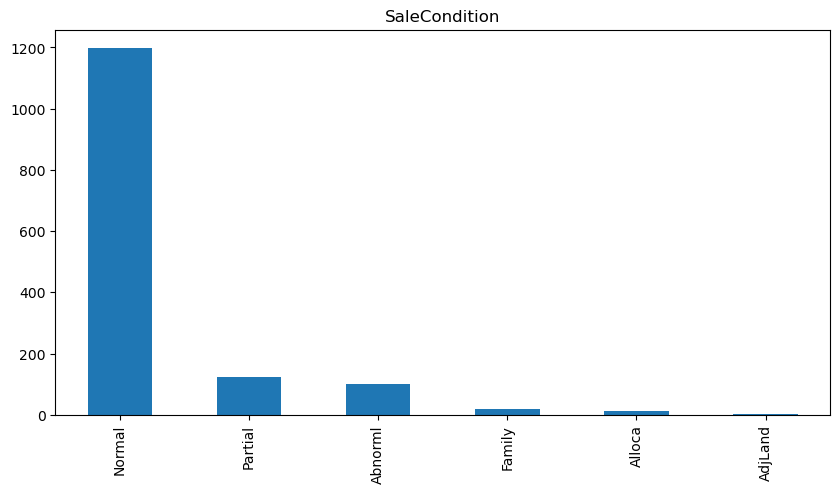

In [79]:
cols = [f for f in dataset.columns if dataset[f].dtype =="O"]
print(cols)
for col in cols:
  dataset[col].value_counts().plot(kind='bar', figsize=(10,5))
  plt.title(col)
  plt.show()


In [47]:
sns.pairplot(dataset[cols], height = 2.5)
plt.show();

ValueError: No variables found for grid columns.

var = "SalePrice"
fig = plt.figure()
res = stats.probplot(dataset[var], plot=plt)

In [71]:
def create_scrollable_table(dataset, table_id, title):
    html = f'<h3>{title}</h3>'
    html += f'<div id="{table_id}" style="height:200px; overflow:auto;">'
    html += df.to_html()
    html += '</div>'
    return html
categorical_features = dataset.select_dtypes(include=[object])
cat_summary_stats = categorical_features.describe().T
html_categorical = create_scrollable_table(cat_summary_stats, "categorical_features", "Summary statistics for categorical features")

display(HTML(html_categorical))
plt.show()

NameError: name 'HTML' is not defined

In [72]:
print(dataset['SalePrice'].describe())
plt.figure(figsize=(9, 8))


count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


<Figure size 900x800 with 0 Axes>

<Figure size 900x800 with 0 Axes>